# Robot-run cafe

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1. Download the data and prepare it for analysis](#OpenData&GeneralInfo)
3. [Step 2. Data analysis](#DataAnalysis)
4. [Step 3. Preparing a presentation](#Presentation)
5. [Conclusion](#Conclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | Your first task is to help optimize marketing expense.                                | 
|  **What we have**        | You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?        |
|  **Main question of project**  |  How much money to invest and where to marketers?                               |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/trainer/data-analyst/lesson/da301f15-cfdb-4ac1-ba36-0872df8f9cf5/task/eb50e373-a61a-4206-89a3-49095515f6a7/)    |
| **Datasets**             | [/datasets/visits_log_us.csv](https://code.s3.yandex.net/datasets/visits_log_us.csv)  |
|                          | [/datasets/orders_log_us.csv](https://code.s3.yandex.net/datasets/orders_log_us.csv)  |
|                          | [/datasets/costs_us.csv](https://code.s3.yandex.net/datasets/costs_us.csv)            |

### Step 1. Download the data and prepare it for analysis. <a name="OpenData&GeneralInfo"></a>

In [2]:
# import all packages
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import re as re
import usaddress

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [3]:
print('Pandas version library:',pd.__version__)
print('Numpy version library:', np.__version__)
print('Seaborn version library:', sns.__version__)
#print('Python version:', python.__version__)

Pandas version library: 0.25.1
Numpy version library: 1.18.5
Seaborn version library: 0.9.0


In [4]:
df_data = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data_us.csv', nrows=9651)

In [5]:
df_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [6]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [7]:
def get_percent_of_na_table(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

In [8]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include=['category', 'object', 'float64']))
    print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [9]:
get_info(df_data)

Head:


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.0
object_name,0,0.0
address,0,0.0
chain,3,0.0
object_type,0,0.0
number,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(9651, 6)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


> * According to general information, the dataset does not have duplicate data.
> * But has 3 missing values in the "chain" column.

In [10]:
df_data[df_data['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [55]:
df_data['chain'].describe()

count      9651
unique        2
top       False
freq       5975
Name: chain, dtype: object

> * According to initial data, more than half of the establishments have no chains.
> * Therefore, for the missing values, we will use that there are no chains for these establishments.

In [11]:
df_data['chain'].mode()

0    False
dtype: object

In [12]:
# Since the variable 'chain' contains boolean values, and it is missing only 3 out of 9648 values, I will replace the missing values with zeros.
df_data['chain'] = df_data['chain'].fillna(df_data['chain'].mode()[0])

In [13]:
get_info(df_data)


Head:


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9651 non-null bool
object_type    9651 non-null object
number         9651 non-null int64
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


,object_name,address,object_type
count,9651,9651,9651
unique,8672,8517,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,Restaurant
freq,47,11,7255


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.0
object_name,0,0.0
address,0,0.0
chain,0,0.0
object_type,0,0.0
number,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(9651, 6)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


> * According to general information, the dataset does not have duplicate data.
> * But has 3 missing values in the "chain" column.
> * According to initial data, more than half of the establishments have no chains.
> * Therefore, for the missing values, we will use that there are no chains for these establishments.

####  Step 2. Data Analysis <a name="DataAnalysis"></a>

- [x] Investigate the proportions of the various types of establishments. Plot a graph.

In [14]:
df_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


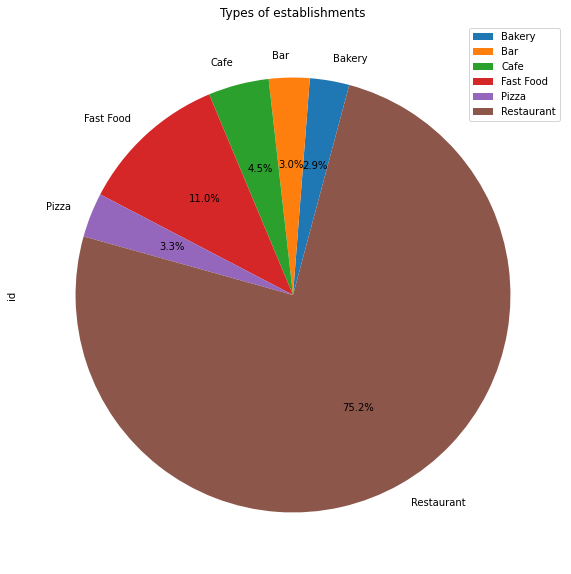

In [15]:
df_data.groupby(['object_type']).count().plot(
    kind='pie', 
    y='id',
    startangle=75,
    figsize=(15,10), 
    autopct='%1.1f%%')

plt.title('Types of establishments')
plt.show() 

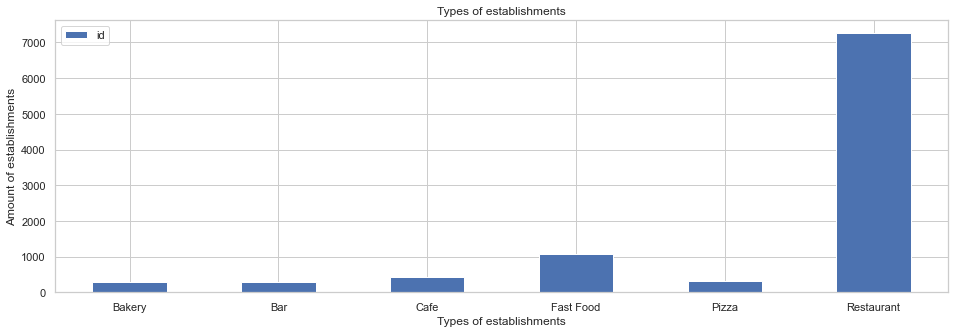

In [104]:
df_data.groupby(['object_type']).count().plot(
    kind='bar', 
    y='id',
    figsize=(16,5),
    grid = True
)

plt.locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.title('Types of establishments')
plt.ylabel('Amount of establishments')
plt.xlabel('Types of establishments')
plt.legend()
plt.show() 

> * According to the plotted graphs, it can be seen that the largest part is occupied by restaurants (75.2%) among the types of establishments.
> * In second place are establishments such as Fast Food (11.0%).
> * And the third most popular is the cafe (4.5%)

* [X] Investigate the proportions of chain and nonchain establishments. Plot a graph.

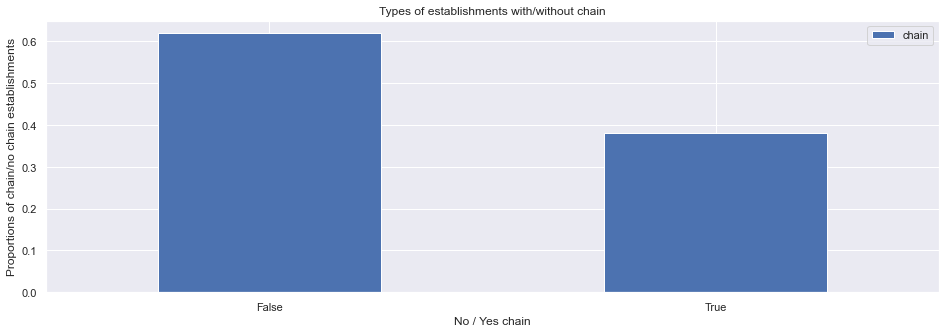

In [73]:
df_data['chain'].value_counts(normalize=True).plot(
    kind='bar',
    figsize=(16,5), 
    grid=True
)
plt.locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.title('Types of establishments with/without chain')
plt.ylabel('Proportions of chain/no chain establishments')
plt.xlabel('No / Yes chain')
plt.legend()
plt.show() 

> * According to the graph, just over 0.6 establishments have no chains and just under 0.4 have chains.

- [X] Which type of establishment is typically a chain?

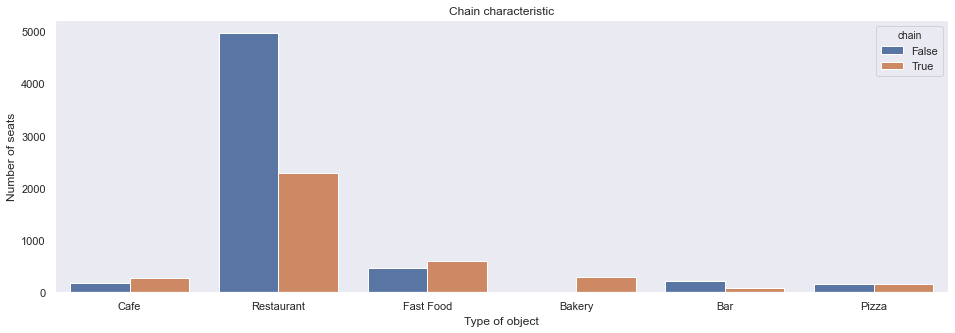

In [77]:
sns.set(style='dark')
plt.figure(figsize=(16,5))
ax = sns.countplot(x='object_type', hue='chain', data=df_data)
plt.title('Chain characteristic')
plt.ylabel('Number of seats')
plt.xlabel('Type of object')
plt.show()

> * According to the data, Restaurants-type establishments usually have the chain - the largest number of seats.
> * Next come Fast Food establishments.
> * Next is a Cafe.
> * Establishments such as a Bakery deserve special attention. All establishments have a chain in it.
> * Interesting, I think, is the case of establishments, such as a Pizza - the number of establishments with and without a chain is equal.
> * The smallest number of establishments where there is a chain is of the Bar type.

- [X] What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

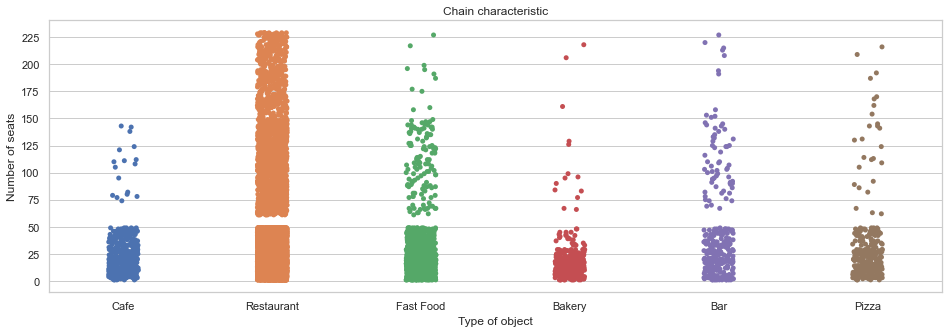

In [87]:
sns.set(style='dark')
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
ax = sns.stripplot(x="object_type", y="number", data=df_data)
plt.locs, labels = plt.yticks()
plt.yticks(np.arange(0, 250, step=25))
plt.setp(labels, rotation=0)
plt.title('Chain characteristic')
plt.ylabel('Number of seats')
plt.xlabel('Type of object')
plt.show()

> * Establishments with a chain generally have 1 to 50 seats.
> * The restaurants have a stable number of seats also in the range from 60 to 150.
> * Bakery establishments have a small number of seats - up to 25.

- [X] Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [102]:
averageNumberOfseats = df_data.groupby(['object_type'])['number'].mean().round().reset_index().sort_values(by='number',ascending=False)
averageNumberOfseats.head(10)

,object_type,number
5,Restaurant,48.0
1,Bar,45.0
3,Fast Food,32.0
4,Pizza,28.0
2,Cafe,25.0
0,Bakery,22.0


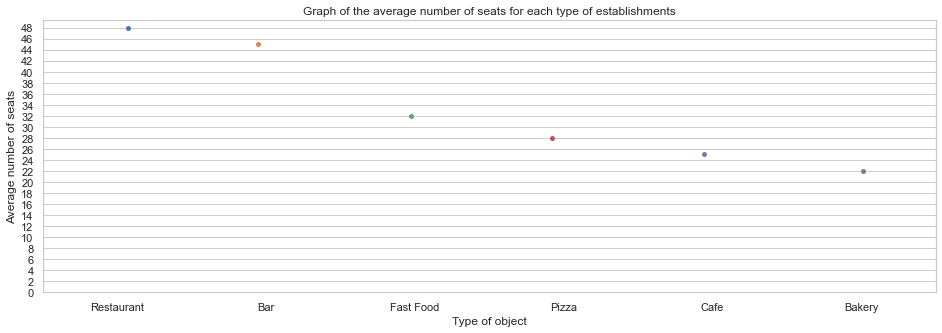

In [103]:
sns.set(style='dark')
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
ax = sns.stripplot(x='object_type', y='number', data=averageNumberOfseats)
plt.locs, labels = plt.yticks()
plt.yticks(np.arange(0, 50, step=2))
plt.setp(labels, rotation=0)
plt.title('Graph of the average number of seats for each type of establishments')
plt.ylabel('Average number of seats')
plt.xlabel('Type of object')
plt.show()

> * On average, Restaurants type of establishments has the greatest number of seats - 48. 

- [X] Put the data on street names from the address column in a separate column.

In [22]:
!pip install usaddress

In [23]:
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

df_data['street_name']=df_data['address'].apply(lambda x : search_words(x)).str.lower()

In [24]:
df_data.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,n eagle rock blvd
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,world way
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,hollywood blvd
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,w sunset blvd
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,echo park ave


- [X] Plot a graph of the top ten streets by number of restaurants.

In [128]:
pivot_streets = df_data.pivot_table(index='street_name', values='id', aggfunc='count').sort_values(by='id',ascending=False).reset_index()
pivot_streets_top_10 = df_data.pivot_table(index='street_name', values='id', aggfunc='count').sort_values(by='id',ascending=False).reset_index().head(10)

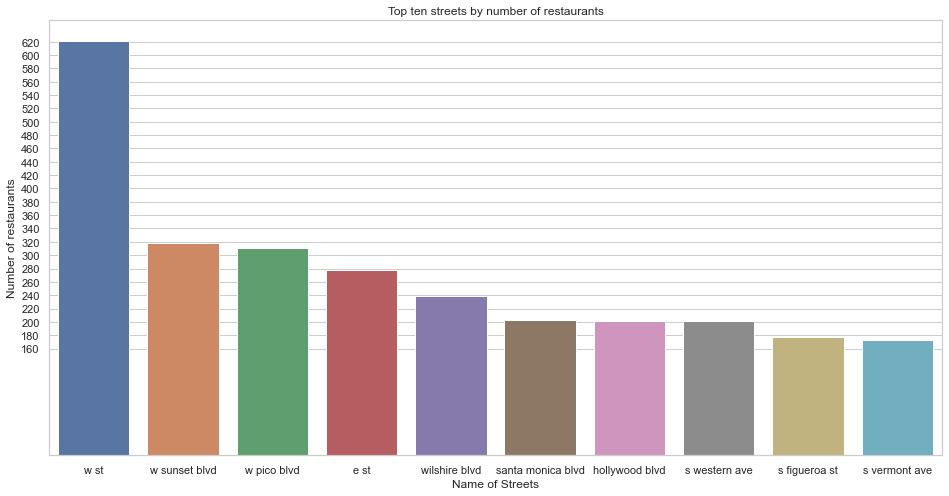

In [130]:
sns.set(style='dark')
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x='street_name', y='id', data=pivot_streets_top_10)
plt.locs, labels = plt.yticks()
plt.yticks(np.arange(160, 640, step=20))
plt.setp(labels, rotation=0)
plt.title('Top ten streets by number of restaurants')
plt.ylabel('Number of restaurants')
plt.xlabel('Name of Streets')
plt.show()

> * "W St" street has a maximum number of establishments - 620.
> * "S Vermont ave" street has a minimum of 170 establishments.

- [X] Find the number of streets that only have one restaurant.

In [131]:
streets_restaurants = df_data.groupby('street_name').agg({'id':'nunique'}).reset_index()
streets_restaurants.columns = ['street_name', 'amount_of_restaurants']
streets_restaurants.head()

,street_name,amount_of_restaurants
0,abbot kinney,1
1,abbot kinney blvd,3
2,academy dr,1
3,airport blvd,10
4,alameda st,1


In [132]:
oneRestaurantOnStreet = streets_restaurants.query('amount_of_restaurants == 1').count()
print('The number of streets that only have one restaurant:', oneRestaurantOnStreet['amount_of_restaurants'])

The number of streets that only have one restaurant: 775


- [X] For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [133]:
np.percentile(pivot_streets['id'], [90, 95])

array([12., 31.])

> * No more than 10% is no more than 12 establishments on the street, no more than 5% is no more than 31 establishments on the street.
> * Thus, let's consider only those streets that have more than 30 establishments. 

In [134]:
list_of_streets = list(pivot_streets[pivot_streets['id'] > 30]['street_name'])
display(list_of_streets)

['w st',
 'w sunset blvd',
 'w pico blvd',
 'e st',
 'wilshire blvd',
 'santa monica blvd',
 'hollywood blvd',
 's western ave',
 's figueroa st',
 's vermont ave',
 'w olympic blvd',
 'beverly blvd',
 'melrose ave',
 'world way',
 'wilshire blvd ste',
 's central ave',
 'venice blvd',
 'n figueroa st',
 'westwood blvd',
 'w st ste',
 's broadway',
 'n western ave',
 'e cesar e chavez ave',
 'whittier blvd',
 'colorado blvd',
 's la brea ave',
 's san pedro st',
 'e whittier blvd',
 'n vermont ave',
 'w slauson ave',
 's main st',
 'w washington blvd',
 'w manchester ave',
 'e olympic blvd',
 'n broadway',
 'w olympic blvd ste',
 's grand ave',
 'sawtelle blvd',
 'york blvd',
 's spring st',
 's western ave ste',
 'san vicente blvd',
 'glendale blvd',
 'n cahuenga blvd',
 's sepulveda blvd',
 'w adams blvd',
 's hill st',
 's alameda st',
 'e florence ave',
 'santa monica blvd ste',
 'n larchmont blvd',
 'w century blvd',
 'crenshaw blvd',
 's figueroa st ste',
 'w jefferson blvd',
 'n

In [135]:
# Get the list of streets that have more restaurants than the number you set as a threshold:
restaurants = df_data[df_data['street_name'].isin(list_of_streets)]
restaurants.head()

,id,object_name,address,chain,object_type,number,street_name
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,world way
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,hollywood blvd
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,w sunset blvd
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,national blvd
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,world way


In [136]:
restaurants['number'].describe()

count    6134.000000
mean       44.218944
std        47.362813
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

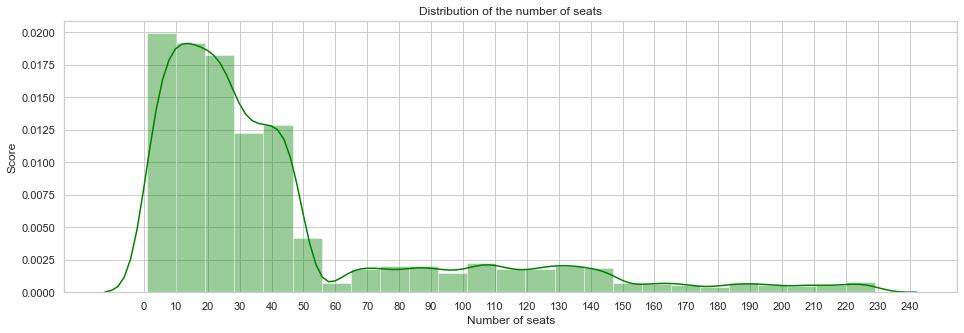

In [140]:
sns.set(style='dark')
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
ax = sns.distplot(restaurants['number'], color='green', bins=25)
plt.locs, labels = plt.xticks()
plt.xticks(np.arange(0, 250, step=10))
plt.setp(labels, rotation=0)
plt.title('Distribution of the number of seats')
plt.ylabel('Score')
plt.xlabel('Number of seats')
plt.show()

> * Looking at the graph, we can say that the most popular are restaurants with a number of seats from 1 to 10.

### Step 3. Preparing a presentation <a name="Presentation"></a>

Presentation: https://drive.google.com/file/d/1_7zj9dwX__Qw8JMBzuF9hKH2SyJXV6YM/view?usp=sharing

### Conclusion <a name="Conclusion"></a>

> * The most popular type of establishment is the restaurant type. This type of establishment has the maximum number of chains in its composition, as well as the maximum number of seats. Compared to other types of establishments:
> * According to the plotted graphs, it can be seen that the largest part is occupied by restaurants (75.2%) among the types of establishments.
> * In second place are establishments such as Fast Food (11.0%).
> * And the third most popular is the cafe (4.5%)
> * If you need to open a network, then you can pay attention to the opening of establishments, such as bakeries. They will definitely be in the format of the chains.
The number of places in the institution. The most optimal, for the first time, at least, can be considered the opening of an institution with a number of seats from 1 to 10, maximum 20.
> * According to the top 10 streets with the largest number of restaurants (30 or more) in the city of Los Angeles and open sources of information, we can conclude that the street in the street is the main street of Los Angeles and therefore the abundance of institutions is not surprising. This raises a question related to costs, the average check and income that an institution can bring, if you open it on one of the streets included in the top 10 by the number of establishments.
> * These conclusions were drawn based on the current dataset. In this set, there is no indication of the profit received, depending on the type of institution. Therefore, it is difficult to say how much the opening of this type of establishment will pay off.